Danny Abraham & Jad Abi Zaki
<center><h1>CMPS 351</h1></center>
<center><h2>Assignment 9</h2></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
import numpy.linalg as la

## Distance Between Polyhedra
---

In [2]:
# definition of two poylogonal regions A1 @ x <= b1 and A2 @ x <= b2
A1 = np.array( [
      [5.8479532e-01,  -1.9354839e+00],
      [2.3859649e+00,   1.1428571e+00],
      [7.0175439e-01,   1.2350230e+00],
      [-1.0292398e+00,  6.8202765e-01],
      [-1.1695906e+00,  5.5299539e-02],
      [-1.4736842e+00, -1.1797235e+00]
      ] )

b1 = np.array( [
      3.3837281e+00,
      9.5981890e-01,
      1.1496483e+00,
      2.4695071e+00,
      2.3474816e+00,
      3.6227127e+00
      ] )

A2 = np.array( [
      [7.0175439e-02,  -2.2304147e+00],
      [2.4795322e+00,   5.5299539e-02],
      [1.1228070e+00,   1.6774194e+00],
      [-1.0994152e+00,  1.1244240e+00],
      [-2.5730994e+00, -6.2672811e-01]
      ] )

b2 = np.array( [
      -6.9765812e-01,
      9.0161964e+00,
      8.8853316e+00,
      2.4482712e+00,
      -3.8164228e+00
      ] )

In [3]:
G = np.identity(4)
v = -np.ones(3)
v[1] = 0
G = G + np.diag(v,-1) + np.diag(v,1)

In [4]:
a = np.zeros(4)
c = np.zeros([11,4])

c[:6] = np.c_[A1[:,0],np.zeros(6),A1[:,1],np.zeros(6)]
c[6:,:] = np.c_[np.zeros(5),A2[:,0],np.zeros(5),A2[:,1]]

b = np.zeros(11)
b[:6] = b1
b[6:] = b2

In [5]:
x = cvx.Variable(4)
obj = cvx.Minimize(cvx.quad_form(x,G))
constraints = [c*x-b<=0]
prob = cvx.Problem(obj,constraints)
prob.solve()

1.1037632742485763

In [6]:
print(' x value = ',x.value)
for c in constraints:
    print(c.dual_value)

 x value =  [ 0.44879957  1.39631338 -0.09712599  0.35672515]
[0.         0.79423952 0.         0.         0.         0.
 0.19850065 0.         0.         0.         0.7418903 ]


Here the lagrange multipliers represent the boundaries of the polyhedron that constain the 2 nearest pints of the 2 polyhedra. They also represent the sensitivity of the solution to changing one of these 3 (in this case) boundaries that determine the solution.

## Portfolio Optimization
---

In [7]:
mean = np.array([0.12,0.1,0.07,0.03])

std = np.array([0.2,0.1,0.05,0])

p = np.array(   [[0.04,0.006,0.004,0],
                [0.006,0.02,0,0],
                [0.004,0,0.0025,0],
                [0,0,0,0]] )

In [8]:
x = cvx.Variable(4, nonneg = True)

constraints_1 = [x*np.ones(4) == 1]

constraints_2 = [x*mean >= 0.10]

constraints = constraints_1 + constraints_2

In [9]:
obj = cvx.Minimize(cvx.quad_form(x,p))
prob =cvx.Problem(obj,constraints)
prob.solve()

0.0108888888888889

In [10]:
x.value

array([3.33333333e-01, 4.44444444e-01, 2.22222222e-01, 3.54347051e-23])

#### Pareto Optimality

In [11]:
term1 = []
term2 = []
for i in range(1000):
    alpha = i/100
    x = cvx.Variable(4, nonneg = True)
    constraints = [x*np.ones(4) == 1]
    obj = cvx.Minimize(cvx.quad_form(x,p)-alpha*x*mean)
    prob = cvx.Problem(obj, constraints)
    prob.solve()
    term1.append(x.value.T@p@x.value)
    term2.append(x.value@mean)

Text(0,0.5,'Reward')

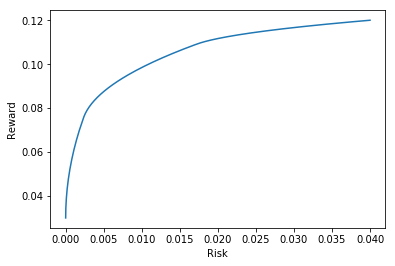

In [12]:
plt.plot(term1, term2)
plt.xlabel('Risk')
plt.ylabel('Reward')

Here we observe that Risk and Reward are correlated. As the Risk increases we get the potential for a greater Reward

#### Short Positions

In [13]:
x = cvx.Variable(4)
x_long = cvx.Variable(4, nonneg = True)
x_short = cvx.Variable(4, nonneg = True)

P = 0.5


constraints_1 = [x_long - x_short == x]

constraints_2 = [P*np.ones(4)*x_long - np.ones(4)*x_short >= 0]

constraints_3 = [x*mean >= 0.12]

constraints_4 = [x*np.ones(4) == 1]
constraints = constraints_1 + constraints_2 + constraints_3 +constraints_4

In [14]:
alpha = 1
obj = cvx.Minimize(cvx.quad_form(x,p))
prob = cvx.Problem(obj, constraints)
prob.solve()

0.009144419199091161

In [15]:
print(x_long.value)

print(x_short.value)

print(x.value)

[4.90627663e-02 3.50823630e-01 1.60011360e+00 2.59525389e-19]
[3.30871911e-02 1.59941848e-19 3.28420922e-19 9.66912809e-01]
[ 0.01597558  0.35082363  1.6001136  -0.96691281]


## Newton's Method for Equality-Constrained Convex Problems
---

$$ r(y) = \begin{bmatrix} \nabla f(x) + A^t \\ Ax + b\end{bmatrix}$$

In [1]:
np.random.seed(421)            # seed the random number generator
n = 100
p = 40

# Generate a random p-by-n matrix with independent rows
A = np.random.randn(p, n)

while np.linalg.matrix_rank(A) !=p : 
    print('generating another data set with independent rows')
    A = np.random.rand(p, n)

# Generate a random right hand side  
b = A @ np.random.randn(n)

NameError: name 'np' is not defined

#### Objective

In [17]:
def func(x):
    return - np.sum(np.log(x))

#### Residual

In [18]:
def res(x, nu):
    r1 = -(1/x) + A.T@nu
    r2 = A@x - b
    r = np.hstack([r1, r2])
    r = r.T
    return r

#### Jacobian

In [19]:
def jacobian(x):
    h = (1/(x**2))
    h = np.diag(h)
    j1 = np.hstack([h, A.T])
    j2 = np.hstack([A, np.zeros([p, p])])
    j = np.vstack([j1, j2])
    return j

In [20]:
x = np.ones(n)
nu = np.zeros(p)

In [21]:
def btLineSearch(x, nu, t, p, alpha = 0.01, beta = 0.8):
    while (x + t*p[:n]<0).any():
        t=t*beta
    while (la.norm(res(x + t*p[:n], nu + t*p[n:])) >= (1 - alpha*t)*la.norm(res(x,nu))):
        t *= beta
    return t

In [22]:
def infeasible_newton(x0, nu0, tol = 2e-6):
    x = x0
    nu= nu0
    histx  = np.array([x0])
    histnu = np.array([nu0])
    while(la.norm(res(x, nu)) > tol):
        print(la.norm(res(x,nu)), end='\r')
        p = la.solve(jacobian(x), - res(x, nu))
        t = btLineSearch(x,nu,1,p)
        x = x + t*p[:n]
        nu = nu + t*p[n:]
        histx = np.vstack([histx , x])
        histnu = np.vstack([histnu , nu])
    return histx, histnu , x, nu 

In [23]:
histx, histnu, xstar, nustar = infeasible_newton(x, nu)

In [24]:
def plot(xstar, nustar, histx, histnu):
    nsteps = len(histx)
    fhist = np.zeros(nsteps)
    fstar = func(xstar)
    for i in range(nsteps):
        fhist[i] = func(histx[i,:])
    plt.figure('convergence')
    plt.semilogy(np.arange(0,nsteps),np.absolute(fhist-fstar))
    plt.xlabel('Iteration Count')
    plt.ylabel(r'$|f^k - f^*|$')
    
    plt.show()

In [25]:
def plotres(xstar, nustar, histx, histnu):
    nsteps = len(histx)
    fhist = np.zeros(nsteps)
    fstar = la.norm(res(xstar, nustar))
    for i in range(nsteps):
        fhist[i] = res(histx[i,:])
    plt.figure('convergence')
    plt.semilogy(np.arange(0,nsteps),np.absolute(fhist-fstar))
    plt.xlabel('Iteration Count')
    plt.ylabel(r'$|f^k - f^*|$')
    
    plt.show()

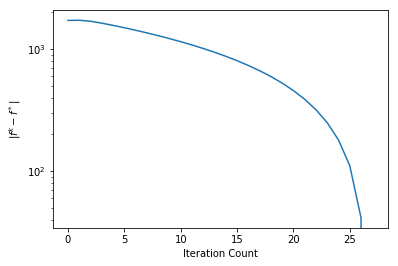

In [26]:
plot(xstar, nustar, histx, histnu)

In [27]:
func(xstar)

-1718.433049412567

The current Newton step is given by

$$\left[ \begin{array}
\;\nabla^2 f & A^t\\
A & 0
\end{array} \right]
%
\left [\begin{array}
\; \Delta x\\
\Delta \nu
\end{array} \right]
=-
%
\left [\begin{array}
\; \nabla f + A^t\nu\\
Ax-b
\end{array} \right]$$

Writing out the equations we get

$$ A^t \Delta\nu+\nabla^2 f\Delta x=-\nabla f-A^t\nu\; (1)$$
$$ 0\Delta\nu+A\Delta x=-Ax+b\; (2)$$ 

By multiplying $(1)$ by $A(\nabla^2 f)^{-1}$ and then subtracting fom $(2)$ we get

$$ (-A\nabla^2 f^{-1}A^t)\Delta\nu = -Ax+b-A\nabla^2 f^{-1}(-\nabla f-A^t\nu) $$

After using the above equation to solve for $ \Delta\nu $ we can use $(1)$ to solve for $\Delta x$.
This series of calculations can replace our original Newton step